In [ ]:
! kaggle datasets download hsmcaju/d-kap

Dataset URL: https://www.kaggle.com/datasets/hsmcaju/d-kap
License(s): DbCL-1.0
 91% 25.0M/27.5M [00:02<00:00, 15.9MB/s]
100% 27.5M/27.5M [00:02<00:00, 10.9MB/s]


In [ ]:
! unzip d-kap.zip

Archive:  d-kap.zip
  inflating: APPLE_DISEASE_DATASET/APPLE ROT LEAVES/1036.JPG.jpeg  
  inflating: APPLE_DISEASE_DATASET/APPLE ROT LEAVES/1062.jpg.jpeg  
  inflating: APPLE_DISEASE_DATASET/APPLE ROT LEAVES/1070.jpg.jpeg  
  inflating: APPLE_DISEASE_DATASET/APPLE ROT LEAVES/1079.jpg.jpeg  
  inflating: APPLE_DISEASE_DATASET/APPLE ROT LEAVES/1080.jpg.jpeg  
  inflating: APPLE_DISEASE_DATASET/APPLE ROT LEAVES/1082.jpg.jpeg  
  inflating: APPLE_DISEASE_DATASET/APPLE ROT LEAVES/1084.jpg.jpeg  
  inflating: APPLE_DISEASE_DATASET/APPLE ROT LEAVES/1086.jpg.jpeg  
  inflating: APPLE_DISEASE_DATASET/APPLE ROT LEAVES/1092.jpg.jpeg  
  inflating: APPLE_DISEASE_DATASET/APPLE ROT LEAVES/1094.jpg.jpeg  
  inflating: APPLE_DISEASE_DATASET/APPLE ROT LEAVES/1095.jpg.jpeg  
  inflating: APPLE_DISEASE_DATASET/APPLE ROT LEAVES/1096.jpg.jpeg  
  inflating: APPLE_DISEASE_DATASET/APPLE ROT LEAVES/1098.jpg.jpeg  
  inflating: APPLE_DISEASE_DATASET/APPLE ROT LEAVES/2000.jpg.jpeg  
  inflating: APPLE_DISEASE_D

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from matplotlib import pyplot as plt
import seaborn as sns
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
DIR_TRAIN = "APPLE_DISEASE_DATASET/"
X = []
y = []
for folder in os.listdir(DIR_TRAIN)[:4]:
    folder_path = os.path.join(DIR_TRAIN, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            try:
                image = Image.open(image_path)
                image_array = np.array(image)
                X.append(image_array)
                y.append(folder)
            except:
                print(f"Error reading image: {image_path}")

# Create a pandas DataFrame
df = pd.DataFrame({'image': X, 'label': y})
print(df.head())

                                               image             label
0  [[[79, 89, 91], [77, 87, 89], [81, 90, 95], [7...  APPLE ROT LEAVES
1  [[[199, 218, 173], [202, 221, 176], [199, 217,...  APPLE ROT LEAVES
2  [[[206, 223, 231], [205, 222, 230], [207, 221,...  APPLE ROT LEAVES
3  [[[145, 141, 140], [147, 143, 142], [166, 161,...  APPLE ROT LEAVES
4  [[[217, 142, 227], [217, 142, 227], [218, 143,...  APPLE ROT LEAVES


In [ ]:
def display_images(folder_path, num_images=12):
    """
    Displays a specified number of images from a given folder.

    Args:
        folder_path (str): Path to the folder containing images.
        num_images (int, optional): Number of images to display. Defaults to 12.
    """

    files = os.listdir(folder_path)
    image_files = [f for f in files if f.endswith(('.jpg', '.jpeg', '.png'))]

    num_images = min(num_images, len(image_files))

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, 6, i + 1)
        image_path = os.path.join(folder_path, image_files[i])
        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis('off')
    plt.show()


Displaying images from : APPLE ROT LEAVES


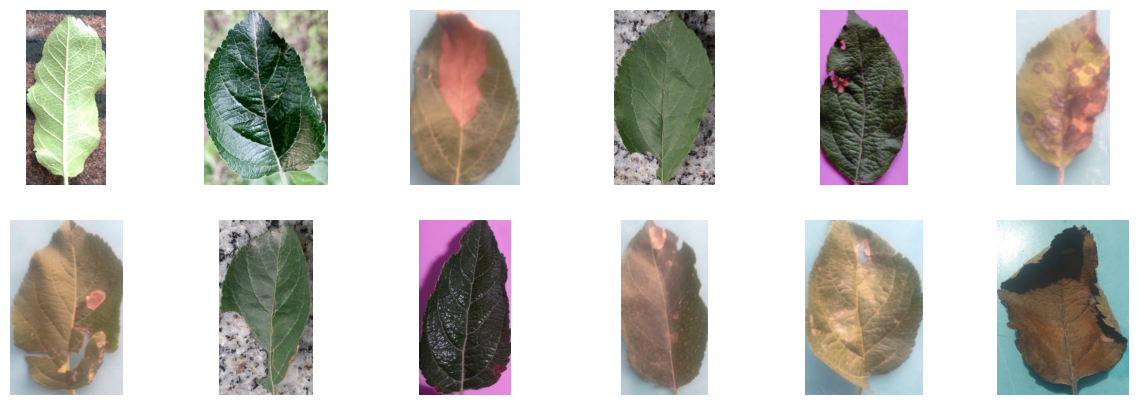

In [ ]:
for folder in os.listdir(DIR_TRAIN)[:1]:
    folder_path = os.path.join(DIR_TRAIN, folder)
    if os.path.isdir(folder_path):
        print(f"Displaying images from : {folder}")
        display_images('/content/APPLE_DISEASE_DATASET/APPLE ROT LEAVES')

Displaying images from: HEALTHY LEAVES


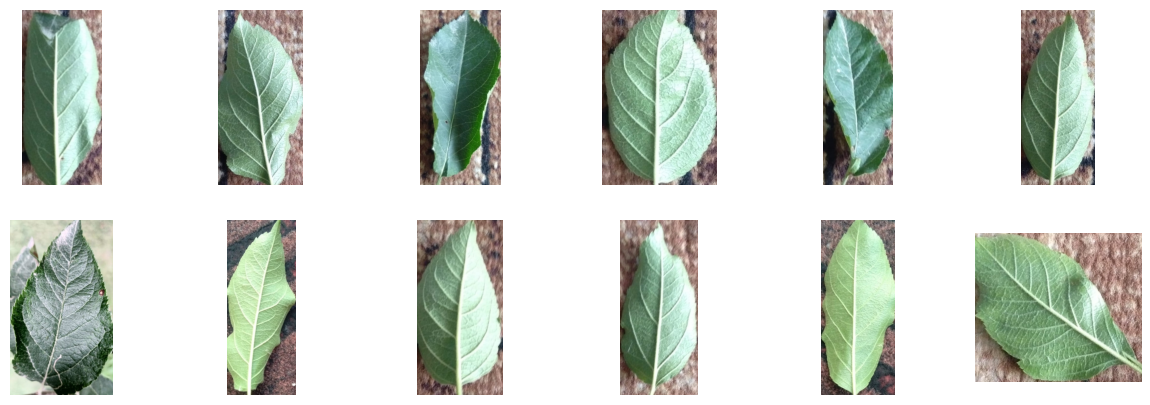

In [ ]:
for folder in os.listdir(DIR_TRAIN)[1:2]:
    folder_path = os.path.join(DIR_TRAIN, folder)
    if os.path.isdir(folder_path):
        print(f"Displaying images from: {folder}")
        display_images('/content/APPLE_DISEASE_DATASET/HEALTHY LEAVES')

Displaying images  from  LEAF BLOTCH


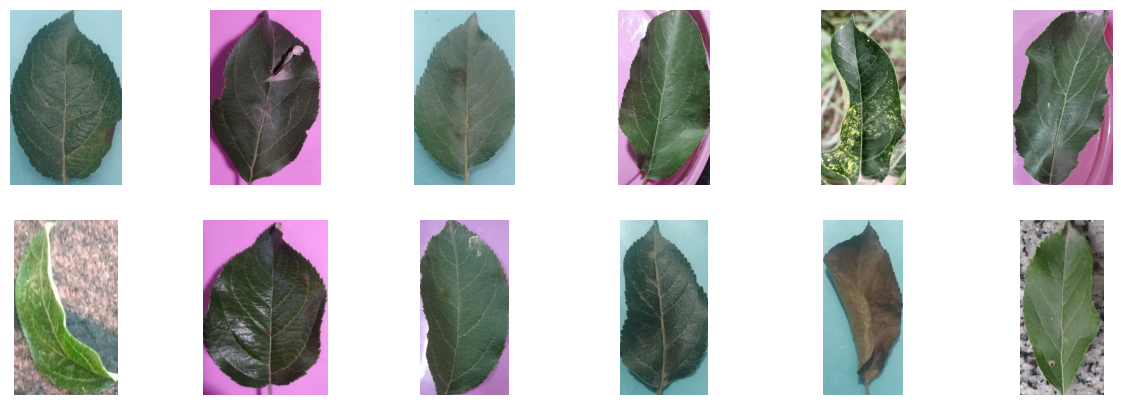

In [ ]:
for folder in os.listdir(DIR_TRAIN)[2:3]:
    folder_path = os.path.join(DIR_TRAIN, folder)
    if os.path.isdir(folder_path):
        print(f"Displaying images  from  {folder}")
        display_images('/content/APPLE_DISEASE_DATASET/LEAF BLOTCH')

Displaying images from: APPLE ROT LEAVES


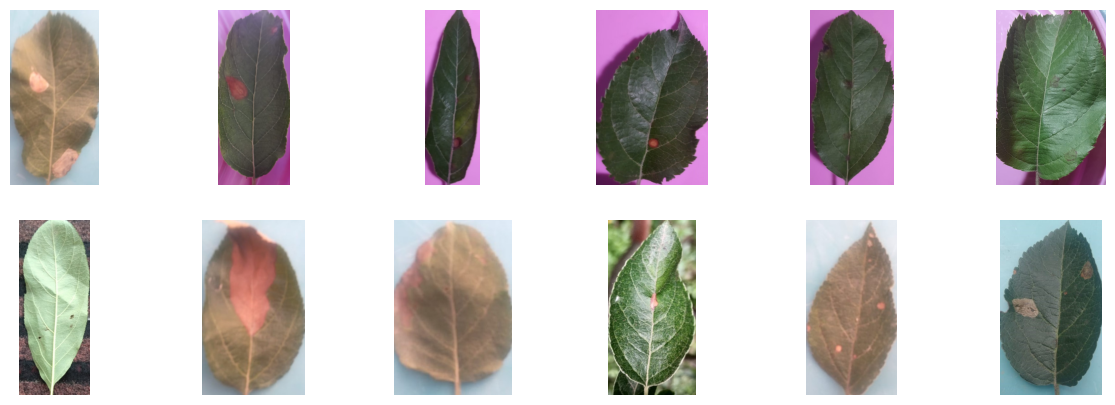

In [ ]:
for folder in os.listdir(DIR_TRAIN)[3:4]:
    folder_path = os.path.join(DIR_TRAIN, folder)
    if os.path.isdir(folder_path):
        print(f"Displaying images from: {folder}")
        display_images('/content/APPLE_DISEASE_DATASET/SCAB LEAVES')

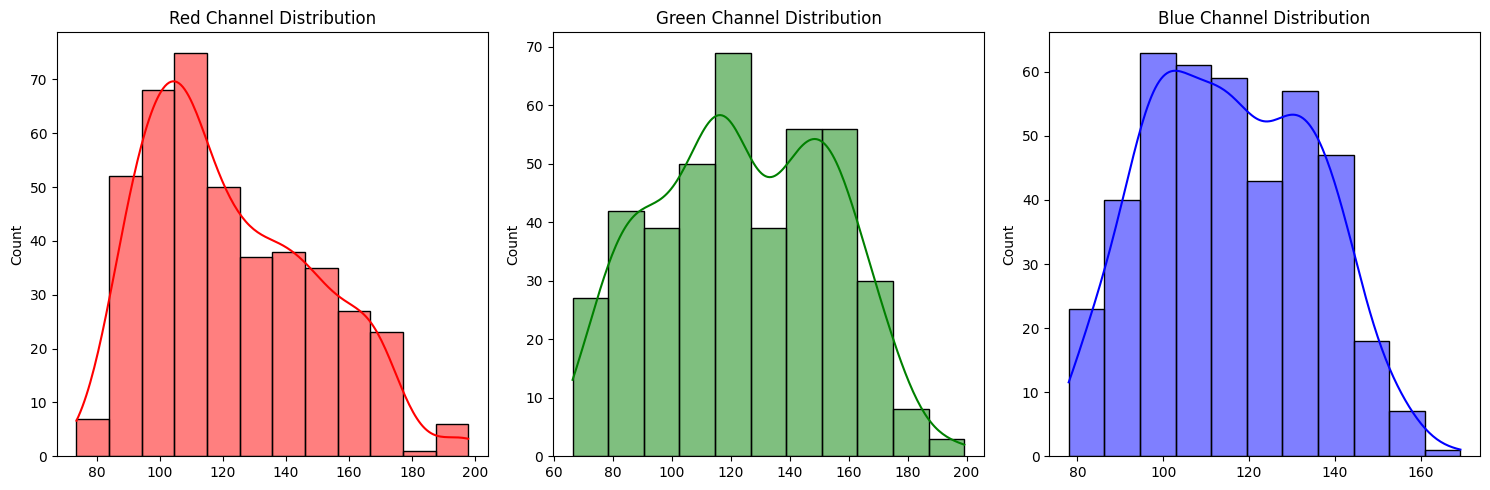

In [ ]:
df = pd.DataFrame({'image': X, 'label': y})
# Extract RGB channels
red_values = [np.mean(image[:,:,0]) for image in df['image']]
green_values = [np.mean(image[:,:,1]) for image in df['image']]
blue_values = [np.mean(image[:,:,2]) for image in df['image']]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot red channel distribution
sns.histplot(red_values, ax=axes[0], color='red', kde=True)
axes[0].set_title('Red Channel Distribution')

# Plot green channel distribution
sns.histplot(green_values, ax=axes[1], color='green', kde=True)
axes[1].set_title('Green Channel Distribution')

# Plot blue channel distribution
sns.histplot(blue_values, ax=axes[2], color='blue', kde=True)
axes[2].set_title('Blue Channel Distribution')

plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

for idx, values in enumerate([red_values, green_values, blue_values]):
    if idx == 0:
        color = "Red"
    if idx == 1:
        color = "Green"
    if idx == 2:
        color = "Blue"
    fig.add_trace(go.Box(x=[color]*len(values), y=values, name=color, marker=dict(color=color.lower())))

fig.update_layout(yaxis_title="Mean value", xaxis_title="Color channel",
                  title="Mean value vs. Color channel", template="plotly_white")

In [ ]:
# Print the number of images in each class
print(df['label'].value_counts())


label
SCAB LEAVES         159
LEAF BLOTCH         111
APPLE ROT LEAVES    103
HEALTHY LEAVES       46
Name: count, dtype: int64


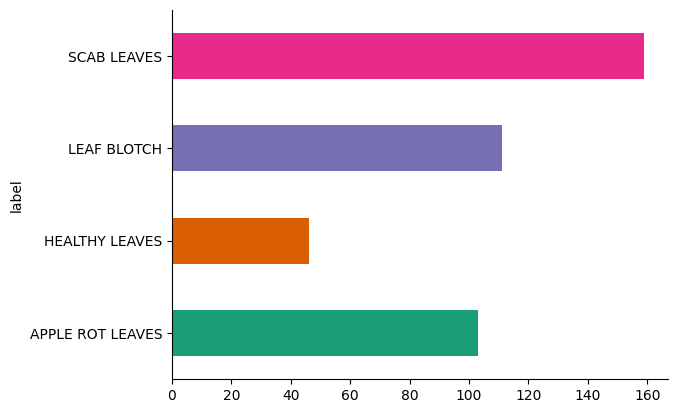

In [ ]:
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
scab  = df[df['label']=='SCAB LEAVES']
blotch = df[df['label']=='LEAF BLOTCH']
healthy = df[df['label']=='HEALTHY LEAVES']
rot = df[df['label']=='APPLE ROT LEAVES']
from sklearn.utils import resample
blotch1 = resample(blotch, replace = True, n_samples = 160)
healthy1 = resample(healthy, replace = True, n_samples = 160)
rot1 = resample(rot, replace = True, n_samples = 160)
#concatenate
df = pd.concat([scab, blotch1, healthy1, rot1])

from sklearn.utils import shuffle
df = shuffle(df)
df = df.sample(frac=1).reset_index(drop=True)

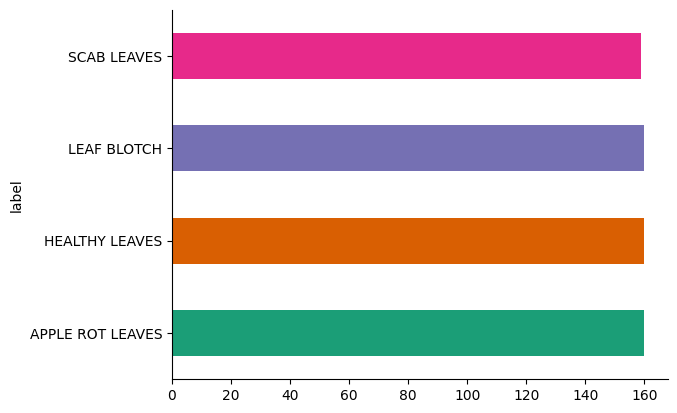

In [ ]:
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['label']=encoder.fit_transform(df['label'])
df.head()

,image,label
0,"[[[220, 173, 243], [219, 172, 242], [219, 172,...",3
1,"[[[155, 150, 156], [166, 161, 167], [179, 174,...",2
2,"[[[200, 224, 236], [200, 224, 236], [200, 222,...",0
3,"[[[184, 212, 213], [184, 212, 213], [184, 212,...",2
4,"[[[226, 215, 197], [228, 217, 199], [220, 208,...",1


In [ ]:
from PIL import Image
import numpy as np

x = []
y = []

for i in range(len(df)):
    image_array = df['image'].iloc[i]

    # Convert the NumPy array to a PIL Image
    image = Image.fromarray(image_array)

    image = image.resize((224,224), Image.ANTIALIAS)
    ar = np.asarray(image)
    x.append(ar)
    species = [int(df['label'].iloc[i])]
    y.append(species)
x = np.array(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
batch_Size=64
steps_per_epoch = x_train.shape[0]//batch_Size
validation_steps = x_test.shape[0]//batch_Size

In [ ]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


In [ ]:
#!pip install tensorflow==2.11.0

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
import tensorflow as tf
import keras

In [ ]:
with strategy.scope():
    resnet_model = Sequential()
    pretrained_model= tf.keras.applications.ResNet50(weights='imagenet',include_top=False,
                       input_shape=(224,224,3),
                       pooling='avg')
    for layer in pretrained_model.layers:
        layer.trainable=True

    resnet_model.add(pretrained_model)
    resnet_model.add(Flatten())
    resnet_model.add(Dense(512, activation='relu'))
    resnet_model.add(Dense(4, activation='sigmoid'))
    resnet_model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])


    resnet_model.build((None, 224, 224, 3))

resnet_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,638,852 (93.99 MB)

 Trainable params: 24,585,732 (93.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
datagen1 = ImageDataGenerator()

test_datagen1 = ImageDataGenerator()

train = datagen1.flow(x_train, y_train, batch_size=64)

test = test_datagen1.flow(
        x_test, y_test,
        batch_size=64)

In [ ]:
epochs = 10
history = resnet_model.fit(train,
                    epochs=epochs,
                    batch_size=64,
                    validation_data=test)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 622ms/step - accuracy: 0.9946 - loss: 0.0154 - val_accuracy: 0.6328 - val_loss: 0.9561
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 602ms/step - accuracy: 0.9953 - loss: 0.0115 - val_accuracy: 0.6484 - val_loss: 0.9027
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 615ms/step - accuracy: 0.9943 - loss: 0.0138 - val_accuracy: 0.6719 - val_loss: 0.8258
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 619ms/step - accuracy: 0.9870 - loss: 0.0194 - val_accuracy: 0.6953 - val_loss: 0.7757
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 623ms/step - accuracy: 0.9914 - loss: 0.0146 - val_accuracy: 0.7031 - val_loss: 0.7312
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 617ms/step - accuracy: 0.9924 - loss: 0.0125 - val_accuracy: 0.7188 - val_loss: 0.7022
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 593ms/step - accuracy: 0.9959 - loss: 0.0103 - val_accuracy: 0.7578 - val_loss: 0.6692
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 588ms/step - accuracy: 0.9965 - loss: 0.0151 - val_accuracy: 0.7891 - val_lo

In [ ]:
loss, accuracy = resnet_model.evaluate(test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Test loss: 0.6343
Test accuracy: 0.8047


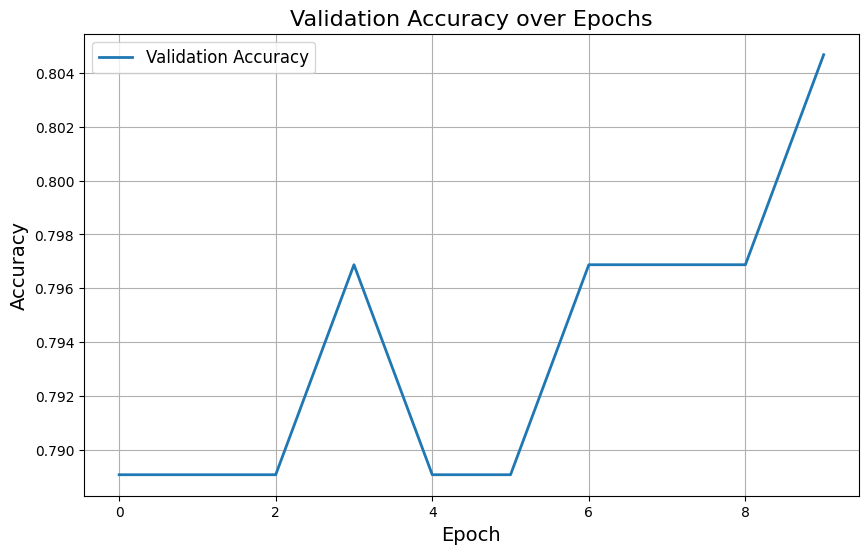

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Validation Accuracy over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
with strategy.scope():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(4, activation='sigmoid'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,245,700 (84.86 MB)

 Trainable params: 22,245,700 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

epochs = 10
history1 = model.fit(train,
                    epochs=epochs,
                    batch_size=batch_Size,
                    validation_data=test)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test)
print('Test accuracy:', test_accuracy)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.8819 - loss: 0.3705 - val_accuracy: 0.7344 - val_loss: 0.8076
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.9204 - loss: 0.2452 - val_accuracy: 0.7734 - val_loss: 0.7792
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.9212 - loss: 0.2096 - val_accuracy: 0.7734 - val_loss: 0.9927
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.9347 - loss: 0.1898 - val_accuracy: 0.7891 - val_loss: 0.8156
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.9522 - loss: 0.1148 - val_accuracy: 0.7500 - val_loss: 0.9718
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.9680 - loss: 0.1124 - val_accuracy: 0.7578 - val_loss: 0.7303
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.9553 - loss: 0.1193 - val_accuracy: 0.7734 - val_loss: 0.8251
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.9811 - loss: 0.0850 - val_accuracy: 0.7344 - val_loss:

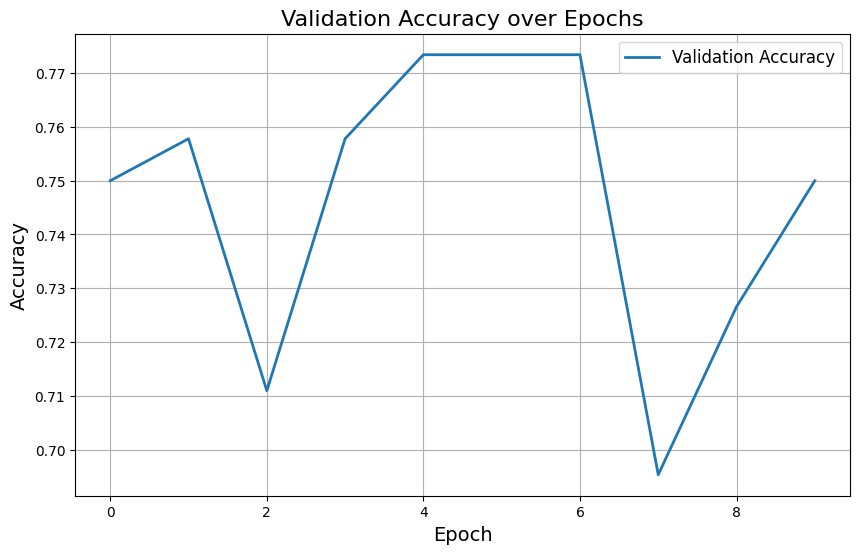

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Validation Accuracy over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train = datagen.flow(x_train, y_train, batch_size=64)

test = test_datagen.flow(
        x_test, y_test,
        batch_size=64)

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = checkpoint2 = ModelCheckpoint("best_model.keras", monitor='val_accuracy', verbose=1,
                                           save_best_only=True, mode='auto',
                                           save_freq='epoch', save_weights_only=False)  # Change file extension to '.keras'
history2 = model.fit(train, epochs=10, shuffle=True, validation_data=test, callbacks=[checkpoint])

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.2384 - loss: 3.0285
Epoch 1: val_accuracy improved from -inf to 0.47656, saving model to best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 75s 8s/step - accuracy: 0.2396 - loss: 2.9678 - val_accuracy: 0.4766 - val_loss: 1.3290
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.4397 - loss: 1.3023
Epoch 2: val_accuracy did not improve from 0.47656
8/8 ━━━━━━━━━━━━━━━━━━━━ 63s 7s/step - accuracy: 0.4381 - loss: 1.3007 - val_accuracy: 0.3438 - val_loss: 1.4692
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.4253 - loss: 1.2223
Epoch 3: val_accuracy did not improve from 0.47656
8/8 ━━━━━━━━━━━━━━━━━━━━ 83s 7s/step - accuracy: 0.4330 - loss: 1.2128 - val_accuracy: 0.4453 - val_loss: 1.0821
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5244 - loss: 0.9837
Epoch 4: val_accuracy did not improve from 0.47656
8/8 ━━━━━━━━━━━━━━━━━━━━ 88s 8s/step - accuracy: 0.5246 - loss: 0.9862 - val_accuracy: 0.4688 - va

In [ ]:
best_model = keras.models.load_model("best_model.keras")

# Evaluate the best model
_, accuracy1 = best_model.evaluate(test)
print('Accuracy of the best model:', accuracy1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6250 - loss: 0.9400
Accuracy of the best model: 0.6171875


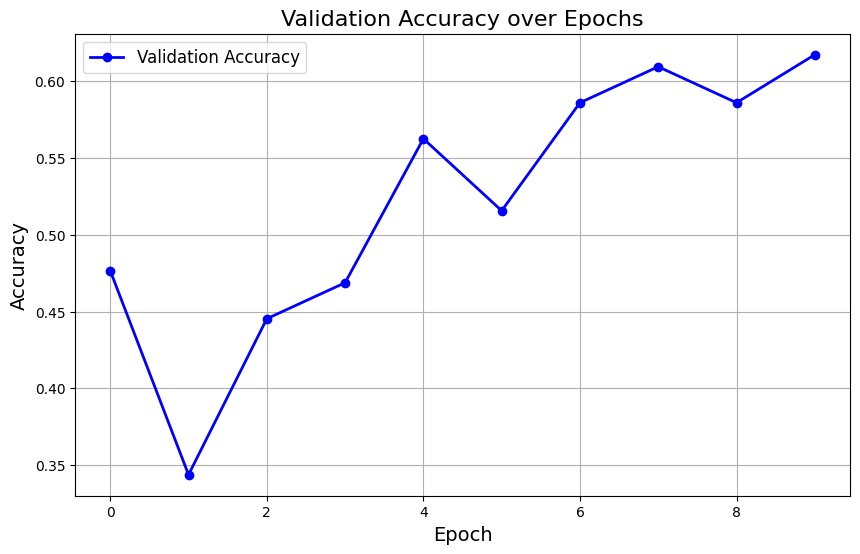

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy', linewidth=2, marker='o', color='blue')
plt.title('Validation Accuracy over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


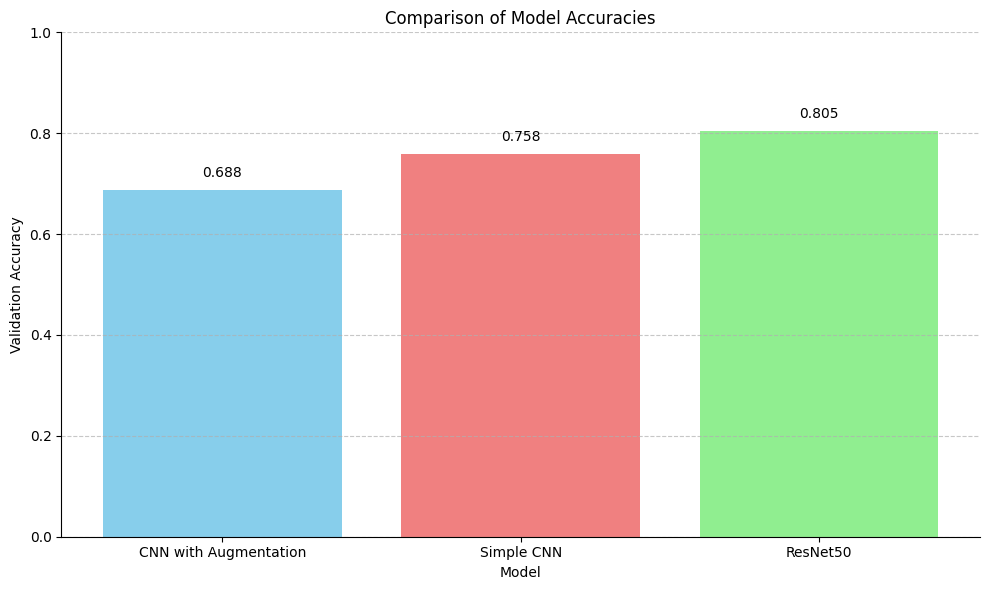

In [ ]:
resnet_accuracy = accuracy
cnn_accuracy = history1.history['val_accuracy'][-1]
cnn_augmented_accuracy = accuracy1

# Model names
models = ['CNN with Augmentation','Simple CNN','ResNet50']
accuracies = [cnn_augmented_accuracy, cnn_accuracy, resnet_accuracy]

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.title('Comparison of Model Accuracies')

# Add annotations for accuracy values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 3), ha='center', va='bottom')

# Customize the plot for better aesthetics
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
def predict_disease(image_path):
  image = Image.open(image_path)
  image = image.resize((224, 224), Image.ANTIALIAS)
  image_array = np.asarray(image)
  image_array = image_array / 255.0  # Normalize pixel values
  image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

  prediction = model.predict(image_array)
  predicted_class_index = np.argmax(prediction)
  predicted_class = encoder.inverse_transform([predicted_class_index])[0]

  print(f"Predicted Disease: {predicted_class}")
  return predicted_class


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Disease: APPLE ROT LEAVES


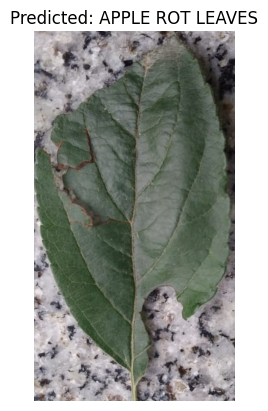

In [ ]:
test_image_path = '/content/APPLE_DISEASE_DATASET/APPLE ROT LEAVES/1080.jpg.jpeg'

predicted_class = predict_disease(test_image_path)

# Display the image
image = Image.open(test_image_path)
plt.imshow(image)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Disease: HEALTHY LEAVES


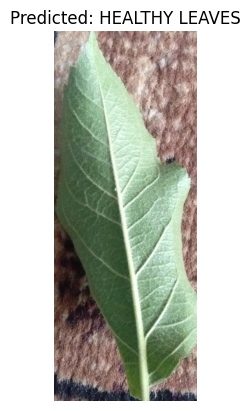

In [ ]:
test_image_path = '/content/APPLE_DISEASE_DATASET/HEALTHY LEAVES/1004.JPG.jpeg'

predicted_class = predict_disease(test_image_path)

# Display the image
image = Image.open(test_image_path)
plt.imshow(image)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Disease: LEAF BLOTCH


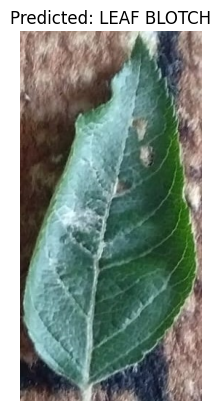

In [ ]:
test_image_path = '/content/APPLE_DISEASE_DATASET/LEAF BLOTCH/1017.JPG.jpeg'

predicted_class = predict_disease(test_image_path)

# Display the image
image = Image.open(test_image_path)
plt.imshow(image)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()
